<a href="https://colab.research.google.com/github/ffer200395/ML-course/blob/main/6_Mortalidad_descriptivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos el framework pySpark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 199 kB 50.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=a8666d86748cfa67dc2da66bf4104e754cda0adee7a3f43fde9d4acd7d3cf42e
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from google.colab import drive
import pyspark.sql.functions as F

In [ ]:
spark = SparkSession.builder.appName("Python Spark Mortalidad").getOrCreate()

In [ ]:
# Path
path = '/content/gdrive/MyDrive/Colab Notebooks/Formación Python y ML/prácticas/'
# Mount drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_spark = spark.read.options(delimiter=",", header=True, inferSchema=True).csv(path+'cause_of_deaths.csv')
df_spark.printSchema()
df_spark.show()

root
 |-- Country/Territory: string (nullable = true)
 |-- Code: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Meningitis: integer (nullable = true)
 |-- Alzheimer's Disease and Other Dementias: integer (nullable = true)
 |-- Parkinson's Disease: integer (nullable = true)
 |-- Nutritional Deficiencies: integer (nullable = true)
 |-- Malaria: integer (nullable = true)
 |-- Drowning: integer (nullable = true)
 |-- Interpersonal Violence: integer (nullable = true)
 |-- Maternal Disorders: integer (nullable = true)
 |-- HIV/AIDS: integer (nullable = true)
 |-- Drug Use Disorders: integer (nullable = true)
 |-- Tuberculosis: integer (nullable = true)
 |-- Cardiovascular Diseases: integer (nullable = true)
 |-- Lower Respiratory Infections: integer (nullable = true)
 |-- Neonatal Disorders: integer (nullable = true)
 |-- Alcohol Use Disorders: integer (nullable = true)
 |-- Self-harm: integer (nullable = true)
 |-- Exposure to Forces of Nature: integer (nullable = true)


In [ ]:
df_grouped.toPandas().to_csv('df_mortalidad_country.csv')

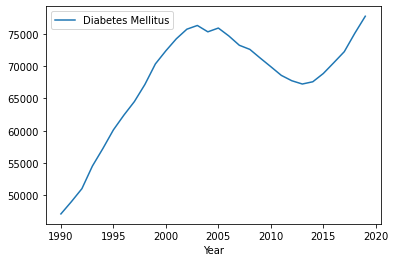

In [ ]:
# Evolución de las muertes por diabetes en estados unidos
df_spark.filter(F.col('Country/Territory') == "United States").sort(F.col("Year").asc()).select('Diabetes Mellitus','Year').toPandas().plot.line(y = "Diabetes Mellitus",x='Year')

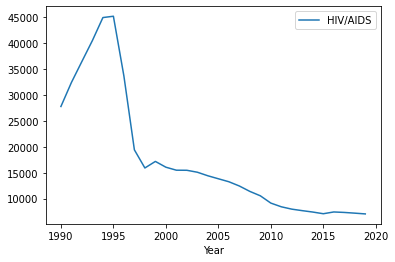

In [ ]:
# Evolución de las muertes por diabetes en estados unidos
df_spark.filter(F.col('Country/Territory') == "United States").sort(F.col("Year").asc()).select('HIV/AIDS','Year').toPandas().plot.line(y = "HIV/AIDS",x='Year')

In [ ]:
# Agrupamos por países
df_grouped = df_spark.groupBy("Country/Territory").sum()
df_grouped.show(truncate=False)

+----------------------------+---------+---------------+--------------------------------------------+------------------------+-----------------------------+------------+-------------+---------------------------+-----------------------+-------------+-----------------------+-----------------+----------------------------+---------------------------------+-----------------------+--------------------------+--------------+---------------------------------+-----------------------+-----------------------------------------+--------------+---------------------------+----------------------+---------------------------+---------------+--------------------------------+------------------+---------------------------------+-----------------------------------------------+-----------------------+-----------------------------------+--------------------+
|Country/Territory           |sum(Year)|sum(Meningitis)|sum(Alzheimer's Disease and Other Dementias)|sum(Parkinson's Disease)|sum(Nutritional Deficiencies

In [ ]:
df_grouped.sort(F.col("sum(HIV/AIDS)").desc()).select("Country/Territory","sum(HIV/AIDS)").show()

+--------------------+-------------+
|   Country/Territory|sum(HIV/AIDS)|
+--------------------+-------------+
|        South Africa|      4874296|
|               Kenya|      2583539|
|            Tanzania|      2465047|
|               India|      2454374|
|             Nigeria|      2216718|
|              Uganda|      2102167|
|            Zimbabwe|      1836042|
|            Ethiopia|      1788429|
|          Mozambique|      1541266|
|              Malawi|      1265348|
|              Zambia|      1175563|
|       Cote d'Ivoire|      1063120|
|Democratic Republ...|      1006324|
|            Cameroon|       743352|
|            Thailand|       618532|
|       United States|       528417|
|               Ghana|       493463|
|              Brazil|       447733|
|               China|       433709|
|              Russia|       350679|
+--------------------+-------------+
only showing top 20 rows



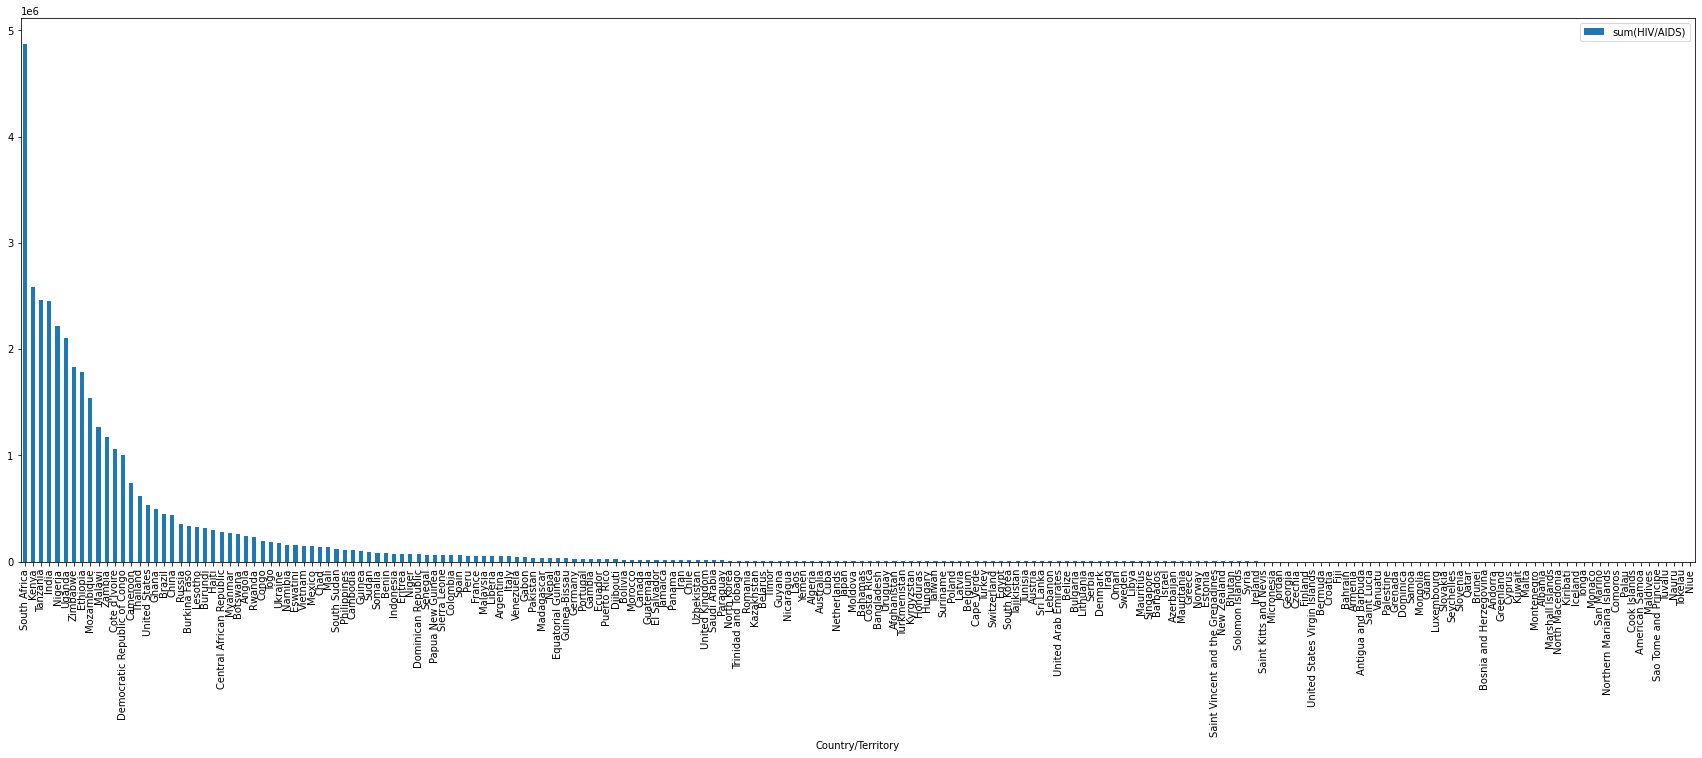

In [ ]:
# Mostrar los países en orden descendente de más a menos fallecidos por VIH 
df_grouped.sort(F.col("sum(HIV/AIDS)").desc()).select("Country/Territory","sum(HIV/AIDS)").toPandas().plot.bar(y = "sum(HIV/AIDS)",x='Country/Territory', figsize=(30,10)) 

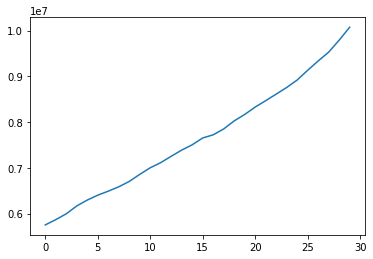

In [ ]:
# Evolución mortalidad cáncer
df_spark.groupBy("Year").sum().sort(F.col("Year").asc()).toPandas()['sum(Neoplasms)'].plot.line()

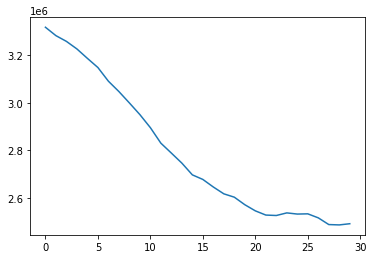

In [ ]:
df_spark.groupBy("Year").sum().sort(F.col("Year").asc()).toPandas()['sum(Lower Respiratory Infections)'].plot.line()

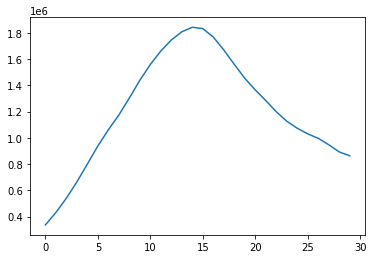

In [ ]:
df_spark.groupBy("Year").sum().sort(F.col("Year").asc()).toPandas()['sum(HIV/AIDS)'].plot.line()